In [196]:
from functions import *
from scipy.linalg import expm
import matplotlib.animation as ani
from matplotlib import rc

## Finding No. of electrons with lowest energy ground state

In [7]:
Vg = 0
ground_states = []
for NUP in range(NSITES+1):
    for NDOWN in range(NUP,NSITES+1):
        if NUP == NDOWN == 0: continue

        states = generateStates(NUP, NDOWN)
        Hamiltonian = generateHamiltonian(states, Vg)

        ground_states += [{"Emin":min(np.linalg.eigvals(Hamiltonian)), "up":NUP, "down":NDOWN}]

## creating heatmap

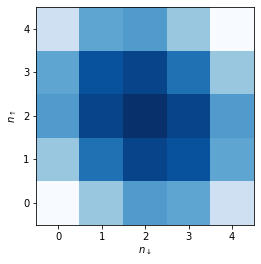

In [9]:
heatmap = np.zeros((NSITES+1,NSITES+1))
for gs in ground_states:
    heatmap[gs["up"], gs["down"]] = gs["Emin"]
    heatmap[gs["down"], gs["up"]] = gs["Emin"]

plt.imshow(heatmap, cmap='Blues_r', interpolation = "nearest", origin="lower")
plt.ylabel(r'$n_\uparrow$')
plt.xlabel(r'$n_\downarrow$')
plt.show()



## Find NUP & NDOWN that gives lowest ground state energy

In [10]:
energies = [gs["Emin"] for gs in ground_states]
imin = energies.index(min(energies))

NUP = ground_states[imin]["up"]
NDOWN = ground_states[imin]["down"]

print("\nLowest ground state energy (Vg=0) for NUP = {} and NDOWN = {}".format(NUP, NDOWN))




Lowest ground state energy (Vg=0) for NUP = 2 and NDOWN = 2


## (n0 vs Vg) and (g vs Vg) graphs

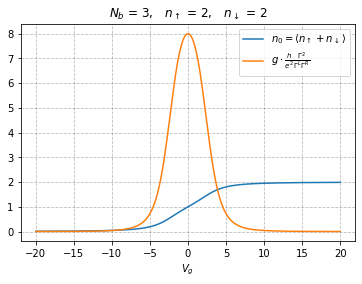

In [11]:
states = generateStates(NUP, NDOWN)

n0 = np.array([])
n0d = np.array([])
Vg_list = np.linspace(-20,20,200)
for Vg in Vg_list:
    Hamiltonian = generateHamiltonian(states, Vg)

    # extract GS energy and its index in the list
    Emin, idx = min((val, idx) for (idx, val) in enumerate(np.linalg.eigvals(Hamiltonian)))

    # extract GS
    groundState = np.linalg.eig(Hamiltonian)[1][:,idx]

    # avg occupation on QD in Ground State (basis transform back to occupation number basis to calc)
    n0_tmp = 0
    for i,x in enumerate(groundState):
        n0_tmp += x**2 *(states[i][0] + states[i][NSITES])
    n0 = np.append(n0, n0_tmp)

# calculate conductivity from n0
g = np.array([8*np.math.sin(np.pi/2 * nVg)**2 for nVg in n0])

plt.plot(Vg_list, n0, label=r'$n_0 = \langle n_\uparrow + n_\downarrow \rangle$')
plt.plot(Vg_list, g, label=r'$g\cdot\frac{h}{e^2} \frac{\Gamma^2}{\Gamma^L \Gamma^R}$')
plt.grid(b=True, which='major', color='#222222', linestyle='--', alpha=0.3)
plt.xlabel(r'$V_g$')
plt.title("{} = {},   {} = {},   {} = {}".format(r'$N_b$',NBATH,r'$n_\uparrow$', NUP, r'$n_\downarrow$', NDOWN))
plt.legend()
plt.show()

In [205]:
def gen_occupation_vector(state, states):
    """
    generates a vector of occupation numbers from a state v
    :param state: np.array in state basis (len(v) == len(states))
    :param states: list of all possible (np.array) states given in occupation number basis 
    :return: vector v_i_s = <n_i_s>
    """

    # initialise vector of occupation numbers
    occ_vector = np.zeros([len(states[0])])

    # we square the weight because one contribution from bra and one from ket
    for i, istate in enumerate(states):
        occ_vector += (abs(state[i])**2)*istate

    return occ_vector


def timeEvolve(state, Hamiltonian, t):
    """
    Returns a state time evolved by t units with a time-independent Hamiltonian
    """
    state_t = expm(1j * Hamiltonian * t).dot(state)
    return state_t


def visualise_occupation(occ_vector):
    data = np.row_stack([occ_vector[:NSITES], occ_vector[NSITES:]])  
    X = np.arange(NSITES)

    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])

    width = 0.4
    labels = ["QD", "B1", "B2", "B3"]
    ax.set_xticks(X)
    ax.set_xticklabels(labels)
    

    ax.bar(X - width/2, data[0], color = 'b', width = width)
    ax.bar(X + width/2, data[1], color = 'g', width = width)


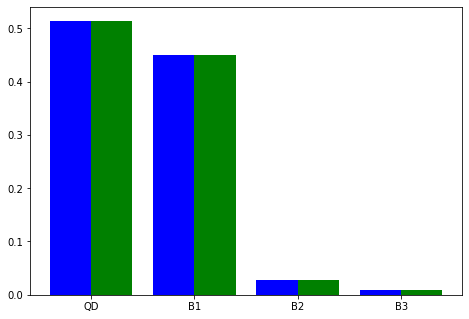

In [255]:
np.random.seed(1)
randState = np.random.rand(len(groundState))
randState = NSITES * randState / sum(randState)

NUP = 1
NDOWN =1
states = generateStates(NUP, NDOWN)
Hamiltonian = generateHamiltonian(states, 2.9)
# extract GS energy and its index in the list
Emin, idx = min((val, idx) for (idx, val) in enumerate(np.linalg.eigvals(Hamiltonian)))
# extract GS
groundState = np.linalg.eig(Hamiltonian)[1][:,idx]

ov = gen_occupation_vector(groundState, states)
ov = gen_occupation_vector(timeEvolve(groundState, Hamiltonian, 1.2), states)
visualise_occupation(ov)

    

In [264]:
needUp = [-1, 1 , 2, -3]

needUp[[i for i, x in enumerate(needUp) if x > 0][0]]


1